**Un Browniano estándar.** \\

---

Simulamos los incrementos porque sabemos que son independientes y se distribuyen normales con media 0 y varianza el tamaño del incremento.

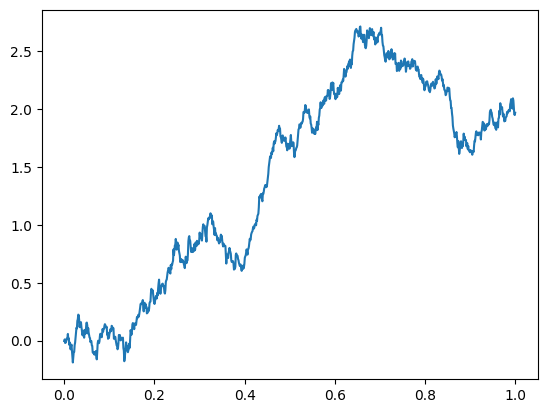

In [23]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000 #número de muestras
T = 1 #tiempo final
B = [0] #el Browniano empieza en 0
times = np.linspace(0, T, n)
dt = times[1] - times[0] #el incremento en linspace (T/n)
dB = np.sqrt(dt) * np.random.normal(size=(n)) #Estos son los incrementos del Browniano: n-1 muestras de una sqrt(dt)*Normal(0,1) = Normal(0, dt)

B = np.cumsum(dB)

B = np.array(B) #tenía una lista y necesitaba un array para graficar.

plt.plot(times, B)
plt.show()

**Animaremos cómo avanza en el tiempo.**

In [25]:
from functools import total_ordering
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

totalframes = 200
step = n // totalframes

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

def init():
    ax.set_xlim(0, T)
    ax.set_ylim(np.min(B), np.max(B))
    return line,

def update(frame):
  line.set_data(times[:frame * step], B[:frame * step])
  return line,
  vertical_line.set_xdata(times[frame * step])

animation = FuncAnimation(fig, update, frames=totalframes, init_func=init, blit=True, interval=100)

HTML(animation.to_jshtml())

Optimicémoslo cambiando por un scatter plot en lugar de line plot

In [5]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
scatter = ax.scatter([], [], s=2)

def init():
    ax.set_xlim(0, T)
    ax.set_ylim(np.min(B), np.max(B))
    return scatter,

def update(frame):
    scatter.set_offsets(np.column_stack((times[:frame], B[:frame])))
    return scatter,

animation = FuncAnimation(fig, update, frames=n, init_func=init, blit=True, interval=10)

HTML(animation.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.